In [3]:
!pip install tensorflow

In [6]:
import numpy as np
import gzip
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import drive

In [7]:
drive.mount('/content/drive')


def load_images(images_path):
    with gzip.open(images_path, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, 28, 28, 1)
    return images


def load_labels(labels_path):
    with gzip.open(labels_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels


train_images_path = '/content/drive/My Drive/train-images-idx3-ubyte.gz'
train_labels_path = '/content/drive/My Drive/train-labels-idx1-ubyte.gz'
test_images_path = '/content/drive/My Drive/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/drive/My Drive/t10k-labels-idx1-ubyte.gz'

train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 49s 64ms/step - loss: 0.6357 - accuracy: 0.7693 - val_loss: 0.4088 - val_accuracy: 0.8481
Epoch 2/10
750/750 [==============================] - 47s 63ms/step - loss: 0.4159 - accuracy: 0.8517 - val_loss: 0.3321 - val_accuracy: 0.8771
Epoch 3/10
750/750 [==============================] - 49s 65ms/step - loss: 0.3621 - accuracy: 0.8687 - val_loss: 0.3122 - val_accuracy: 0.8853
Epoch 4/10
750/750 [==============================] - 47s 62ms/step - loss: 0.3290 - accuracy: 0.8814 - val_loss: 0.2918 - val_accuracy: 0.8892
Epoch 5/10
750/750 [==============================] - 53s 70ms/step - loss: 0.3009 - accuracy: 0.8895 - val_loss: 0.2707 - val_accuracy: 0.8992
Epoch 6/10
750/750 [==============================] - 47s 63ms/step - loss: 0.2820 - accuracy: 0.8974 - val_loss: 0.2675 - val_accuracy: 0.9021
Epoch 7/10
750/750 [==============================] - 48s 64ms/step - loss: 0.2612 - accuracy: 0.9062 - val_loss: 0.2585 - val_accuracy:

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - loss: 0.2481 - accuracy: 0.9108 - 3s/epoch - 11ms/step
Test accuracy: 0.9107999801635742


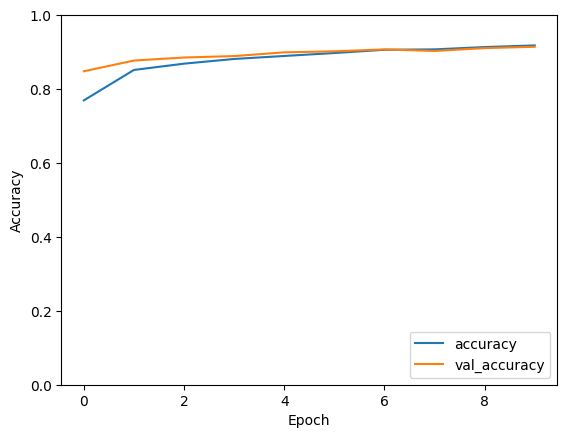

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
model.save('fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
